In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("C:\\Users\\Acer\\Desktop\\Web Scraping\\2019 Final Tables\\2019Final.csv", index_col=[0])
df.head()

,PS19_Rnk,KP19_Rank,TeamID,TS19_Team,KP19_Conference,TS19_GP,STA19_W,STA19_L,STA19_Pct,STA19_Strk,...,Opp_KP19_Luck,Opp_KP19_Luck_Rk,Opp_KP19_Strength of Schedule,Opp_KP19_SOS Rk,Opp_KP19_Non-Conference Strength of Schedule,Opp_KP19_NCSOS Rk,Opp_KP19_Average Opponents Offensive Efficiency,Opp_KP19_AOOE Rk,Opp_KP19_Average Opponents Defensive Efficiency,Opp_KP19_AODE Rk
AP19_Rnk,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,76,168.0,Vermont,AE,33,27,7,0.794,L1,...,0.046,70.0,10.46,30.0,0.93,128.0,109.8,20.0,99.3,33.0
11.0,NaN,12,130.0,Houston,Amer,33,33,4,0.892,L1,...,0.033,98.0,11.32,19.0,1.75,107.0,110.7,5.0,99.4,34.0
11.0,NaN,12,130.0,Houston,Amer,33,33,4,0.892,L1,...,0.143,2.0,1.09,115.0,3.50,70.0,105.2,121.0,104.1,137.0
11.0,NaN,12,130.0,Houston,Amer,33,33,4,0.892,L1,...,0.013,147.0,11.68,17.0,-2.95,246.0,110.4,8.0,98.8,24.0
NaN,NaN,69,302.0,Temple,Amer,32,23,10,0.697,L2,...,0.025,113.0,-1.98,194.0,3.78,63.0,103.6,183.0,105.6,198.0


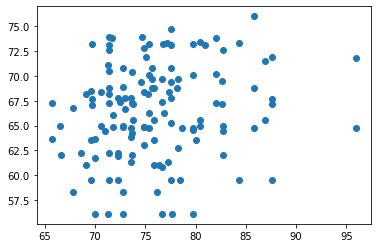

In [8]:
plt.scatter(df['STA19_PPG'], df['Opp_STA19_PAPG'])

In [9]:
import numpy as np
import pandas as pd

In [10]:
import statsmodels.api as sm

In [11]:
import statsmodels.formula.api as smf

In [12]:
data18 = pd.read_csv("C:\\Users\\Acer\\Desktop\\Web Scraping\\2018 Final Tables\\2018Final.csv")
data19 = pd.read_csv("C:\\Users\\Acer\\Desktop\\Web Scraping\\2019 Final Tables\\2019Final.csv")

In [13]:
df19 = pd.DataFrame(data19)
df18 = pd.DataFrame(data18)
df19

,AP19_Rnk,PS19_Rnk,KP19_Rank,TeamID,TS19_Team,KP19_Conference,TS19_GP,STA19_W,STA19_L,STA19_Pct,...,Opp_KP19_Luck,Opp_KP19_Luck_Rk,Opp_KP19_Strength of Schedule,Opp_KP19_SOS Rk,Opp_KP19_Non-Conference Strength of Schedule,Opp_KP19_NCSOS Rk,Opp_KP19_Average Opponents Offensive Efficiency,Opp_KP19_AOOE Rk,Opp_KP19_Average Opponents Defensive Efficiency,Opp_KP19_AODE Rk
0,NaN,NaN,76,168.0,Vermont,AE,33,27,7,0.794,...,0.046,70.0,10.46,30.0,0.93,128.0,109.8,20.0,99.3,33.0
1,11.0,NaN,12,130.0,Houston,Amer,33,33,4,0.892,...,0.033,98.0,11.32,19.0,1.75,107.0,110.7,5.0,99.4,34.0
2,11.0,NaN,12,130.0,Houston,Amer,33,33,4,0.892,...,0.143,2.0,1.09,115.0,3.50,70.0,105.2,121.0,104.1,137.0
3,11.0,NaN,12,130.0,Houston,Amer,33,33,4,0.892,...,0.013,147.0,11.68,17.0,-2.95,246.0,110.4,8.0,98.8,24.0
4,NaN,NaN,69,302.0,Temple,Amer,32,23,10,0.697,...,0.025,113.0,-1.98,194.0,3.78,63.0,103.6,183.0,105.6,198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,4.0,3.0,2,1.0,Gonzaga,WCC,33,33,4,0.892,...,-0.029,255.0,10.49,28.0,-4.04,276.0,108.8,43.0,98.3,18.0
130,4.0,3.0,2,1.0,Gonzaga,WCC,33,33,4,0.892,...,0.046,70.0,10.46,30.0,0.93,128.0,109.8,20.0,99.3,33.0
131,4.0,3.0,2,1.0,Gonzaga,WCC,33,33,4,0.892,...,0.004,171.0,11.18,21.0,-5.39,307.0,109.8,19.0,98.7,22.0
132,NaN,NaN,31,18.0,Saint Mary's,WCC,33,22,12,0.647,...,0.044,73.0,8.00,51.0,3.32,78.0,108.8,44.0,100.8,55.0


In [6]:
dependent_var19 = pd.DataFrame(data19, columns = ["PF**"])
dependent_var19

,PF**
0,69.0
1,58.0
2,84.0
3,74.0
4,70.0
...,...
129,83.0
130,72.0
131,69.0
132,57.0


In [7]:
X19 = df19[["STA19_PPG","KP19_Strength of Schedule","Opp_STA19_PAPG"]]
y19 = dependent_var19["PF**"]
X19 = sm.add_constant(X19)

model19 = sm.OLS(y19,X19).fit()
predictions19 = model19.predict(X19)

model19.summary()

C:\Users\Acer\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PF**   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     30.28
Date:                Tue, 17 Mar 2020   Prob (F-statistic):           6.53e-15
Time:                        12:56:18   Log-Likelihood:                -483.87
No. Observations:                 134   AIC:                             975.7
Df Residuals:                     130   BIC:                             987.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -56.6427     14.275     -3.968      0.000     -84.884     -28.401
STA19_PPG                     0.5627      0.143      3.948      0.000       0.281       0.845
KP19_Strength of Schedule     0.5002      0.122      4.089      0.000       0.258       0.742
Opp_STA19_PAPG                1.2153      0.169      7.178      0.000       0.880       1.550
==============================================================================
Omnibus:                        1.510   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.470   Jarque-Bera (JB):                1.517
Skew:                           0.181   Prob(JB):                        0.468
Kurtosis:                       2.625   Cond. No.                     1.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
model19.params

const                       -56.642701
STA19_PPG                     0.562659
KP19_Strength of Schedule     0.500212
Opp_STA19_PAPG                1.215311
dtype: float64

In [49]:
#2018
#One Variable
y1_18 = -5.02543 + 0.976939 * int(df18.loc[df18['TS18_Team'] == "UMBC", 'STA18_PPG'][0])
y1_18

66.291117

In [47]:
df18['STA18_PPG'] = pd.to_numeric(df18['STA18_PPG'])
a = df18.loc[df18['TS18_Team'] == "UMBC", 'STA18_PPG'][0]
a

73.05555555555556

In [46]:
print(a)

0    73.055556
1    73.055556
Name: STA18_PPG, dtype: float64


In [44]:
b = df18.iloc[0][df18['TS18_Team' == "UMBC"], 'STA18_PPG']

KeyError: False

In [42]:
b

AP18_Rnk                                             NaN
PS18_Rnk                                             NaN
KP18_Rank                                            166
TeamID                                               162
TS18_Team                                           UMBC
                                                   ...  
Opp_KP18_NCSOS Rk                                    158
Opp_KP18_Average Opponents Offensive Efficiency      110
Opp_KP18_AOOE Rk                                      33
Opp_KP18_Average Opponents Defensive Efficiency    100.7
Opp_KP18_AODE Rk                                      33
Name: 0, Length: 120, dtype: object

In [14]:
df = pd.concat([df18,df19], ignore_index = True)

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [15]:
df

,AP18_Rnk,AP19_Rnk,KP18_ADE Rk,KP18_AODE Rk,KP18_AOE Rk,KP18_AOOE Rk,KP18_AT Rk,KP18_Adjusted Defensive Efficiency,KP18_Adjusted Offensive Efficiency,KP18_Adjusted Tempo,...,TS19_FGA,TS19_FGM,TS19_FT%,TS19_FTA,TS19_FTM,TS19_GP,TS19_Team,Team,TeamID,WL
0,NaN,NaN,124.0,259.0,206.0,267.0,170.0,102.6,103.1,68.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UMBC,162.0,W
1,NaN,NaN,124.0,259.0,206.0,267.0,170.0,102.6,103.1,68.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UMBC,162.0,L
2,16.0,NaN,111.0,70.0,4.0,79.0,162.0,101.9,121.0,68.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wichita St.,148.0,L
3,21.0,NaN,13.0,75.0,38.0,95.0,167.0,94.4,114.6,68.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Houston,130.0,L
4,21.0,NaN,13.0,75.0,38.0,95.0,167.0,94.4,114.6,68.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Houston,130.0,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1997.0,1062.0,0.767,718.0,551.0,33.0,Gonzaga,Gonzaga,1.0,W
264,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1997.0,1062.0,0.767,718.0,551.0,33.0,Gonzaga,Gonzaga,1.0,W
265,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1997.0,1062.0,0.767,718.0,551.0,33.0,Gonzaga,Gonzaga,1.0,L
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1850.0,876.0,0.745,549.0,409.0,33.0,Saint Mary's,Saint Mary's (CA),18.0,L


In [16]:
df18

,AP18_Rnk,PS18_Rnk,KP18_Rank,TeamID,TS18_Team,KP18_Conference,TS18_GP,STA18_W,STA18_L,STA18_Pct,...,Opp_KP18_Luck,Opp_KP18_Luck_Rk,Opp_KP18_Strength of Schedule,Opp_KP18_SOS Rk,Opp_KP18_Non-Conference Strength of Schedule,Opp_KP18_NCSOS Rk,Opp_KP18_Average Opponents Offensive Efficiency,Opp_KP18_AOOE Rk,Opp_KP18_Average Opponents Defensive Efficiency,Opp_KP18_AODE Rk
0,NaN,NaN,166,162.0,UMBC,AE,34,25,11,0.694,...,0.048,66,9.24,37,-0.08,158,110.0,33,100.7,33
1,NaN,NaN,166,162.0,UMBC,AE,34,25,11,0.694,...,0.071,31,9.39,34,-6.50,324,111.0,14,101.6,59
2,16.0,7.0,21,148.0,Wichita State,Amer,32,25,8,0.758,...,0.060,54,0.07,137,-7.00,333,105.6,118,105.5,164
3,21.0,NaN,18,130.0,Houston,Amer,32,27,8,0.771,...,0.052,61,10.32,18,-4.83,301,111.4,7,101.1,47
4,21.0,NaN,18,130.0,Houston,Amer,32,27,8,0.771,...,-0.032,265,3.46,86,-0.80,177,107.2,80,103.8,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,NaN,NaN,78,2.0,South Dakota State,Sum,34,28,7,0.800,...,0.020,124,8.75,44,0.26,151,109.8,40,101.1,46
130,NaN,NaN,101,24.0,Georgia State,SB,33,24,11,0.686,...,-0.019,230,3.46,87,-4.21,294,106.9,89,103.4,90
131,8.0,18.0,10,1.0,Gonzaga,WCC,34,32,5,0.865,...,-0.024,244,-4.57,280,-3.46,272,103.7,210,108.2,315
132,8.0,18.0,10,1.0,Gonzaga,WCC,34,32,5,0.865,...,0.020,124,8.75,44,0.26,151,109.8,40,101.1,46


In [17]:
df19

,AP19_Rnk,PS19_Rnk,KP19_Rank,TeamID,TS19_Team,KP19_Conference,TS19_GP,STA19_W,STA19_L,STA19_Pct,...,Opp_KP19_Luck,Opp_KP19_Luck_Rk,Opp_KP19_Strength of Schedule,Opp_KP19_SOS Rk,Opp_KP19_Non-Conference Strength of Schedule,Opp_KP19_NCSOS Rk,Opp_KP19_Average Opponents Offensive Efficiency,Opp_KP19_AOOE Rk,Opp_KP19_Average Opponents Defensive Efficiency,Opp_KP19_AODE Rk
0,NaN,NaN,76,168.0,Vermont,AE,33,27,7,0.794,...,0.046,70.0,10.46,30.0,0.93,128.0,109.8,20.0,99.3,33.0
1,11.0,NaN,12,130.0,Houston,Amer,33,33,4,0.892,...,0.033,98.0,11.32,19.0,1.75,107.0,110.7,5.0,99.4,34.0
2,11.0,NaN,12,130.0,Houston,Amer,33,33,4,0.892,...,0.143,2.0,1.09,115.0,3.50,70.0,105.2,121.0,104.1,137.0
3,11.0,NaN,12,130.0,Houston,Amer,33,33,4,0.892,...,0.013,147.0,11.68,17.0,-2.95,246.0,110.4,8.0,98.8,24.0
4,NaN,NaN,69,302.0,Temple,Amer,32,23,10,0.697,...,0.025,113.0,-1.98,194.0,3.78,63.0,103.6,183.0,105.6,198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,4.0,3.0,2,1.0,Gonzaga,WCC,33,33,4,0.892,...,-0.029,255.0,10.49,28.0,-4.04,276.0,108.8,43.0,98.3,18.0
130,4.0,3.0,2,1.0,Gonzaga,WCC,33,33,4,0.892,...,0.046,70.0,10.46,30.0,0.93,128.0,109.8,20.0,99.3,33.0
131,4.0,3.0,2,1.0,Gonzaga,WCC,33,33,4,0.892,...,0.004,171.0,11.18,21.0,-5.39,307.0,109.8,19.0,98.7,22.0
132,NaN,NaN,31,18.0,Saint Mary's,WCC,33,22,12,0.647,...,0.044,73.0,8.00,51.0,3.32,78.0,108.8,44.0,100.8,55.0


In [22]:
list(df18.columns)

['AP18_Rnk',
 'PS18_Rnk',
 'KP18_Rank',
 'TeamID',
 'TS18_Team',
 'KP18_Conference',
 'TS18_GP',
 'STA18_W',
 'STA18_L',
 'STA18_Pct',
 'STA18_Strk',
 'STA18_Conf_W',
 'STA18_Conf_L',
 'STA18_Conf_Pct',
 'STA18_Home_W',
 'STA18_Home_L',
 'STA18_Away_W',
 'STA18_Away_L',
 'STA18_Neutral_W',
 'STA18_Neutral_L',
 'STA_Top25_W',
 'STA_Top25_L',
 'STA_Conf_PF',
 'STA18_Conf_PA',
 'STA18_Conf_PPG',
 'STA18_Conf_PAPG',
 'STA18_PF',
 'STA18_PA',
 'STA18_PPG',
 'STA18_PAPG',
 'TS18_FGM',
 'TS18_FGA',
 'TS18_FG%',
 'TS18_3PM',
 'TS18_3PA',
 'TS18_3P%',
 'TS18_FTM',
 'TS18_FTA',
 'TS18_FT%',
 'KP18_Ajusted Efficiency Margin',
 'KP18_Adjusted Offensive Efficiency',
 'KP18_AOE Rk',
 'KP18_Adjusted Defensive Efficiency',
 'KP18_ADE Rk',
 'KP18_Adjusted Tempo',
 'KP18_AT Rk',
 'KP18_Luck',
 'KP18_Luck Rk',
 'KP18_Strength of Schedule',
 'KP_SOS Rk',
 'KP18_Non-Conference Strength of Schedule',
 'KP18_NCSOS Rk',
 'KP18_Average Opponents Offensive Efficiency',
 'KP18_AOOE Rk',
 'KP18_Average Opponents 

In [23]:
df18.columns = ['AP_Rnk','PS_Rnk','KP_Rank','TeamID','TS_Team','KP_Conference','TS_GP','STA_W','STA_L','STA_Pct','STA_Strk','STA_Conf_W','STA_Conf_L','STA_Conf_Pct','STA_Home_W','STA_Home_L','STA_Away_W','STA_Away_L','STA_Neutral_W','STA_Neutral_L','STA_Top25_W','STA_Top25_L','STA_Conf_PF','STA_Conf_PA','STA_Conf_PPG','STA_Conf_PAPG','STA_PF','STA_PA','STA_PPG','STA_PAPG','TS_FGM','TS_FGA','TS_FG%','TS_3PM','TS_3PA','TS_3P%','TS_FTM','TS_FTA','TS_FT%','KP_Ajusted Efficiency Margin','KP_Adjusted Offensive Efficiency','KP_AOE Rk','KP_Adjusted Defensive Efficiency','KP_ADE Rk','KP_Adjusted Tempo','KP_AT Rk','KP_Luck','KP_Luck Rk','KP_Strength of Schedule','KP_SOS Rk','KP_Non-Conference Strength of Schedule','KP_NCSOS Rk','KP_Average Opponents Offensive Efficiency','KP_AOOE Rk','KP_Average Opponents Defensive Efficiency','KP_AODE Rk','Team','Seed','Opponent','OppSeed','PF**','PA','WL','OppTeamID','Opp_AP_Rnk','Opp_PS_Rnk','Opp_KP_Rank','Opp_TeamID','Opp_TS_Team','Opp_KP_Conference','Opp_TS_GP','Opp_STA_W','Opp_STA_L','Opp_STA_Pct','Opp_STA_Strk','Opp_STA_Conf_W','Opp_STA_Conf_L','Opp_STA_Conf_Pct','Opp_STA_Home_W','Opp_STA_Home_L','Opp_STA_Away_W','Opp_STA_Away_L','Opp_STA_Neutral_W','Opp_STA_Neutral_L','Opp_STA_Top25_W','Opp_STA_Top25_L','Opp_STA_Conf_PF','Opp_STA_Conf_PA','Opp_STA_Conf_PPG','Opp_STA_Conf_PAPG','Opp_STA_PF','Opp_STA_PA','Opp_STA_PPG','Opp_STA_PAPG','Opp_TS_FGM','Opp_TS_FGA','Opp_TS_FG%','Opp_TS_3PM','Opp_TS_3PA','Opp_TS_3P%','Opp_TS_FTM','Opp_TS_FTA','Opp_TS_FT%','Opp_KP_Ajusted Efficiency Margin','Opp_KP_Adjusted Offensive Efficiency','Opp_KP AOW Rk','Opp_KP_Adjusted Defensive Efficiency','Opp_KP_ADE Rk','Opp_KP_Adjusted Tempo','Opp_KP_AT Rk','Opp_KP_Luck','Opp_KP_Luck_Rk','Opp_KP_Strength of Schedule','Opp_KP_SOS Rk','Opp_KP_Non-Conference Strength of Schedule','Opp_KP_NCSOS Rk','Opp_KP_Average Opponents Offensive Efficiency','Opp_KP_AOOE Rk','Opp_KP_Average Opponents Defensive Efficiency','Opp_KP_AODE Rk']
df19.columns = ['AP_Rnk','PS_Rnk','KP_Rank','TeamID','TS_Team','KP_Conference','TS_GP','STA_W','STA_L','STA_Pct','STA_Strk','STA_Conf_W','STA_Conf_L','STA_Conf_Pct','STA_Home_W','STA_Home_L','STA_Away_W','STA_Away_L','STA_Neutral_W','STA_Neutral_L','STA_Top25_W','STA_Top25_L','STA_Conf_PF','STA_Conf_PA','STA_Conf_PPG','STA_Conf_PAPG','STA_PF','STA_PA','STA_PPG','STA_PAPG','TS_FGM','TS_FGA','TS_FG%','TS_3PM','TS_3PA','TS_3P%','TS_FTM','TS_FTA','TS_FT%','KP_Ajusted Efficiency Margin','KP_Adjusted Offensive Efficiency','KP_AOE Rk','KP_Adjusted Defensive Efficiency','KP_ADE Rk','KP_Adjusted Tempo','KP_AT Rk','KP_Luck','KP_Luck Rk','KP_Strength of Schedule','KP_SOS Rk','KP_Non-Conference Strength of Schedule','KP_NCSOS Rk','KP_Average Opponents Offensive Efficiency','KP_AOOE Rk','KP_Average Opponents Defensive Efficiency','KP_AODE Rk','Team','Seed','Opponent','OppSeed','PF**','PA','WL','OppTeamID','Opp_AP_Rnk','Opp_PS_Rnk','Opp_KP_Rank','Opp_TeamID','Opp_TS_Team','Opp_KP_Conference','Opp_TS_GP','Opp_STA_W','Opp_STA_L','Opp_STA_Pct','Opp_STA_Strk','Opp_STA_Conf_W','Opp_STA_Conf_L','Opp_STA_Conf_Pct','Opp_STA_Home_W','Opp_STA_Home_L','Opp_STA_Away_W','Opp_STA_Away_L','Opp_STA_Neutral_W','Opp_STA_Neutral_L','Opp_STA_Top25_W','Opp_STA_Top25_L','Opp_STA_Conf_PF','Opp_STA_Conf_PA','Opp_STA_Conf_PPG','Opp_STA_Conf_PAPG','Opp_STA_PF','Opp_STA_PA','Opp_STA_PPG','Opp_STA_PAPG','Opp_TS_FGM','Opp_TS_FGA','Opp_TS_FG%','Opp_TS_3PM','Opp_TS_3PA','Opp_TS_3P%','Opp_TS_FTM','Opp_TS_FTA','Opp_TS_FT%','Opp_KP_Ajusted Efficiency Margin','Opp_KP_Adjusted Offensive Efficiency','Opp_KP AOW Rk','Opp_KP_Adjusted Defensive Efficiency','Opp_KP_ADE Rk','Opp_KP_Adjusted Tempo','Opp_KP_AT Rk','Opp_KP_Luck','Opp_KP_Luck_Rk','Opp_KP_Strength of Schedule','Opp_KP_SOS Rk','Opp_KP_Non-Conference Strength of Schedule','Opp_KP_NCSOS Rk','Opp_KP_Average Opponents Offensive Efficiency','Opp_KP_AOOE Rk','Opp_KP_Average Opponents Defensive Efficiency','Opp_KP_AODE Rk']

In [25]:
df = pd.concat([df18,df19], ignore_index = True)

In [26]:
df

,AP_Rnk,PS_Rnk,KP_Rank,TeamID,TS_Team,KP_Conference,TS_GP,STA_W,STA_L,STA_Pct,...,Opp_KP_Luck,Opp_KP_Luck_Rk,Opp_KP_Strength of Schedule,Opp_KP_SOS Rk,Opp_KP_Non-Conference Strength of Schedule,Opp_KP_NCSOS Rk,Opp_KP_Average Opponents Offensive Efficiency,Opp_KP_AOOE Rk,Opp_KP_Average Opponents Defensive Efficiency,Opp_KP_AODE Rk
0,NaN,NaN,166,162.0,UMBC,AE,34,25,11,0.694,...,0.048,66.0,9.24,37.0,-0.08,158.0,110.0,33.0,100.7,33.0
1,NaN,NaN,166,162.0,UMBC,AE,34,25,11,0.694,...,0.071,31.0,9.39,34.0,-6.50,324.0,111.0,14.0,101.6,59.0
2,16.0,7.0,21,148.0,Wichita State,Amer,32,25,8,0.758,...,0.060,54.0,0.07,137.0,-7.00,333.0,105.6,118.0,105.5,164.0
3,21.0,NaN,18,130.0,Houston,Amer,32,27,8,0.771,...,0.052,61.0,10.32,18.0,-4.83,301.0,111.4,7.0,101.1,47.0
4,21.0,NaN,18,130.0,Houston,Amer,32,27,8,0.771,...,-0.032,265.0,3.46,86.0,-0.80,177.0,107.2,80.0,103.8,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,4.0,3.0,2,1.0,Gonzaga,WCC,33,33,4,0.892,...,-0.029,255.0,10.49,28.0,-4.04,276.0,108.8,43.0,98.3,18.0
264,4.0,3.0,2,1.0,Gonzaga,WCC,33,33,4,0.892,...,0.046,70.0,10.46,30.0,0.93,128.0,109.8,20.0,99.3,33.0
265,4.0,3.0,2,1.0,Gonzaga,WCC,33,33,4,0.892,...,0.004,171.0,11.18,21.0,-5.39,307.0,109.8,19.0,98.7,22.0
266,NaN,NaN,31,18.0,Saint Mary's,WCC,33,22,12,0.647,...,0.044,73.0,8.00,51.0,3.32,78.0,108.8,44.0,100.8,55.0


In [27]:
##########
#2018Final
##########

df.to_csv(r"C:\\Users\\Acer\\Desktop\\Web Scraping\\AllTournaments.csv", index = False, sep = ',', encoding = 'utf-8')

In [28]:
dependent_var = pd.DataFrame(df, columns = ["PF**"])
dependent_var

,PF**
0,74.0
1,43.0
2,75.0
3,63.0
4,67.0
...,...
263,83.0
264,72.0
265,69.0
266,57.0


In [37]:
X = df[["STA_PPG","KP_Strength of Schedule","Opp_STA_W","Opp_STA_L","Opp_STA_PAPG"]]
y = dependent_var["PF**"]
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PF**   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     31.50
Date:                Tue, 17 Mar 2020   Prob (F-statistic):           4.42e-25
Time:                        15:19:23   Log-Likelihood:                -980.89
No. Observations:                 268   AIC:                             1974.
Df Residuals:                     262   BIC:                             1995.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -24.7462     17.293     -1.431      0.154     -58.797       9.305
STA_PPG                     0.7362      0.109      6.727      0.000       0.521       0.952
KP_Strength of Schedule     0.5043      0.092      5.479      0.000       0.323       0.686
Opp_STA_W                  -0.6905      0.298     -2.314      0.021      -1.278      -0.103
Opp_STA_L                  -0.9477      0.397     -2.386      0.018      -1.730      -0.166
Opp_STA_PAPG                0.9237      0.136      6.815      0.000       0.657       1.191
==============================================================================
Omnibus:                        0.996   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.608   Jarque-Bera (JB):                1.086
Skew:                           0.139   Prob(JB):                        0.581
Kurtosis:                       2.857   Cond. No.                     3.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
model.params

const                     -24.746160
STA_PPG                     0.736241
KP_Strength of Schedule     0.504309
Opp_STA_W                  -0.690474
Opp_STA_L                  -0.947672
Opp_STA_PAPG                0.923679
dtype: float64